In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Carregando os dados e avaliando o balanceamento

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

pd.value_counts(y_train)

11501568/11490434 [==============================] - 0s 0us/step


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
# Normalizando e obtendo dummies das saídas
x_train = x_train/255
x_test = x_test/255
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

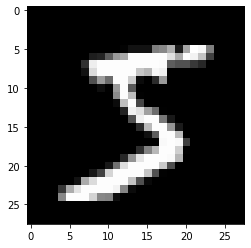

In [ ]:
# Visualizando uma das amostras
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
# Criando a rede convolucional

inputs = keras.Input(shape=(28,28,1))

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)
x = layers.Dense(50, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                             

In [ ]:
# Treinando o modelo
hist = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2) # 20% para validação

Epoch 1/10
750/750 [==============================] - 12s 17ms/step - loss: 0.0077 - accuracy: 0.9979 - precision: 0.9980 - recall: 0.9979 - val_loss: 0.0441 - val_accuracy: 0.9908 - val_precision: 0.9908 - val_recall: 0.9907
Epoch 2/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0037 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9987 - val_loss: 0.0345 - val_accuracy: 0.9921 - val_precision: 0.9925 - val_recall: 0.9919
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0054 - accuracy: 0.9984 - precision: 0.9984 - recall: 0.9984 - val_loss: 0.0516 - val_accuracy: 0.9893 - val_precision: 0.9896 - val_recall: 0.9892
Epoch 4/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0081 - accuracy: 0.9978 - precision: 0.9978 - recall: 0.9978 - val_loss: 0.0484 - val_accuracy: 0.9910 - val_precision: 0.9912 - val_recall: 0.9909
Epoch 5/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0049 - accuracy: 0

In [ ]:
# Predição dos dados de teste

preds = model.predict(x_test)

preds = np.array([np.argmax(arr) for arr in preds], dtype=np.int)
test = np.array([np.argmax(arr) for arr in y_test.values], dtype=np.int)

preds[:10], test[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

In [ ]:
# Avaliando acurácia, precisão, recall e F1 da classificação dos dados teste
print(classification_report(test, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



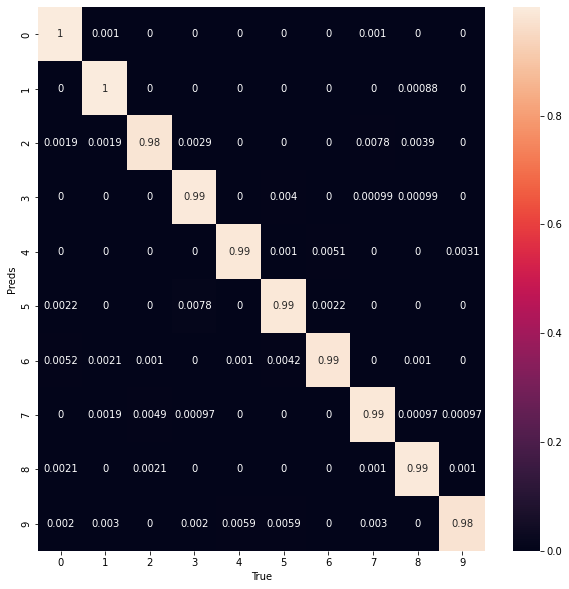

In [ ]:
# Matriz de confusão
cm = confusion_matrix(test, preds, normalize='true')

plt.figure(figsize=[10,10])
sns.heatmap(data=cm, annot=True)
plt.xlabel("True")
plt.ylabel("Preds")
plt.show()

In [ ]:
# Vemos que na matriz de confusão que o 9 é um dos que possuem os menor valor de verdadeiros positivos, tendo falsos negativos no 8, 7 e 4, e falsos positivos
# no 0, 1, 3, 4, 5 e 7.
# Avaliando quantos são os falsos negativos (poderia retirar o normalize na matriz de confusão tbm):
false9s = (preds==9)*(test!=9)
pd.value_counts(test[false9s])

4    3
7    1
8    1
dtype: int64

      0  1  2  3  4  5  6  7  8  9
947   0  0  0  0  0  0  0  0  1  0
1242  0  0  0  0  1  0  0  0  0  0
2130  0  0  0  0  1  0  0  0  0  0
4199  0  0  0  0  0  0  0  1  0  0
8527  0  0  0  0  1  0  0  0  0  0


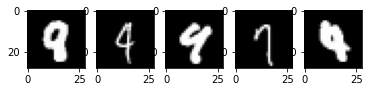

In [ ]:
# Analizando quais são os falsos negativos do 9. Vemos que algumas imagens
# realmente possuem alguma semelhança com o número.

img_false9s = x_test[false9s]

for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(img_false9s[i-1], cmap='gray')

print(y_test[false9s])